# Creating Dynamic Active Subspaces for an HIV Model

##### Tyson loudon
##### Stephen Pankavich, Colorado School of Mines, <pankavic@mines.edu>
##### Ryan Howard, Colorado School of Mines, <ryhoward@mines.edu>

<br>

In this notebook, we'll be summarizing the active subspaces-based sensitivity analysis and low-dimensional approximation of an HIV model, presented in [[1]][R1].

### Introduction

Acquired Immune Deficiency Syndrome (AIDS) is caused by the Human Immunodeficiency Virus (HIV). One way to develop treatment strategies for this virus is through mathematical and computational models. However, most HIV models do not accurately characterize all stages of the infection, but one model recently developed does capture all three stages (acute, chronic, and AIDS). Here, we'll describe the model and use _active subspaces_ to perform sensitivity analysis on the model's parameters and explore the possibility for lowering the model's dimension.

### Active Subspaces

Active subspaces is a method of dimension reduction that identifies linear combinations of input parameters whose values are more important in characterizing a model's output than  orthogonal linear combinations' values. Consider a model's scalar output, $f$, as a  function of an $m$-dimensional normalized parameter vector, $\mathbf x:\ f = f(\mathbf x)$. The active sbspace method is based on the matrix

$$
\mathbf C = \int\nabla f(\mathbf x)\nabla f(\mathbf x)^T\rho(\mathbf x)\ d\mathbf x = \mathbf W\Lambda\mathbf W^T,
$$

where $\rho$ is a probability density on $\mathbf x$ and $\mathbf W\Lambda\mathbf W^T$ is the eigendecomposition of $\mathbf C$, with the eigenvalues in descending order. The eigenvalues satisfy the relationship $\lambda_i = \int (\nabla f^T\mathbf w_i)^2\rho\ d\mathbf x$, meaning that an eigenvalue quantifies the average squared directional derivative of $f$ in the direction defined by the corresponding eigenvector. If the first $n < m$ eigenvalues are large compared to the rest, $f$ will likely be relatively flat in the directions defined by the last $m-n$ eigenvectors and could be approximated by an $n$-dimensional function of the active variables, $\mathbf y\equiv \mathbf W_1^T\mathbf x$, where $\mathbf W_1$ contains the first $n$ eigenvectors.

Since $\mathbf C$ can't usually be computed analytically, we can approximate it with the following simple Monte Carlo method:
1. Draw $\{\mathbf x_j\}_{j=1}^N$ from $\rho$.
2. Compute (or approximate) $\nabla f_j = \nabla f(\mathbf x_j)\ \forall j$.
3. Then $\mathbf C \approx\hat{\mathbf C} = \frac 1 N \sum_{j=1}^N\nabla f_j\nabla f_j^T = \hat{\mathbf W}\hat\Lambda\hat{\mathbf W}^T$

### The HIV Model

The HIV model we examine consists of 7 coupled ordinary differential equations:

$$
\begin{align}
\frac{dT}{dt} &= s_1 + \frac{p_1}{C_1+V}TV - \delta_1T - (K_1V + K_2M_I)T,\\
\frac{dT_I}{dt} &= \psi(K_1V + K_2M_I)T + \alpha_1T_L-\delta_2T_I-K_3T_ICTL,\\
\frac{dT_L}{dt} &= (1-\psi)(K_1V+K_2M_I)T-\alpha_1T_L-\delta_3T_L,\\
\frac{dM}{dt} &= s_2+K_4MV-K_5MV-\delta_4M,\\
\frac{dM_I}{dt} &= K_5MV-\delta_5M_I-K_6M_ICTL,\\
\frac{dCTL}{dt} &= s_3 + (K_7T_I+K_8M_I)CTL-\delta_6CTL,\\
\frac{dV}{dt} &= K_9T_I+K_{10}M_I-K_{11}TV-(K_{12}+K_{13})MV-\delta_7V,
\end{align}
$$

where $T(t)$ is the CD4$^+$ T-cell population, $T_I$ is the actively infected T-cell population, $T_L$ represents latently-infected T-cells, $M$ is macrophages, $M_I$ is infected macrophages, $CTL$ is cytotoxic lymphocytes, and $V$ is virions. The model's 27 parameters are summarized in the table below.

Parameter|Nominal Value|Distribution (U(min, max))
:-------:|:-----------:|:-------------:
$s_1$|  10 |  U(9.75, 10.25)
$s_2$|   .15 |  U(.14625, .15375)
$s_3$|   5  | U(4.875, 5.125)
$p_1$|   .2 |  U(.195, .205)
$C_1$|   55.6  | U(54.21, 56.99)
$K_1$|   3.87e-3 |  U(3.77325e-3, 3.96675e-3)
$K_2$|   1e-6  | U(.975e-6, 1.025e-6)
$K_3$|   4.5e-4 |  U(4.3875e-4, 4.6125e-4)
$K_4$|   7.45e-4 |  U(7.26375e-4, 7.63625e-4)
$K_5$|   5.22e-4 |  U(5.0895e-4, 5.3505e-4)
$K_6$|   3e-6  | U(2.925e-6, 3.075e-6)
$K_7$|   3.3e-4  | U(3.2175e-4, 3.3825e-4)
$K_8$|   6e-9  | U(5.85e-9, 6.15e-9)
$K_9$|   .537 |  U(.523575, .550425)
$K_{10}$|   .285 |  U(.277875, .292125)
$K_{11}$|   7.79e-6 |  U(7.59525e-6, 7.98475e-6)
$K_{12}$|   1e-6  | U(.975e-6, 1.025e-6)
$K_{13}$|   4e-5   |U(3.9e-5, 4.1e-5)
$\delta_1$|   .01 |  U(.00975, .01025)
$\delta_2$|   .28  | U(.273, .287)
$\delta_3$|   .05  | U(.04875, .05125)
$\delta_4$|   .005  | U(.004875, .005125)
$\delta_5$|   .005 |  U(.004875, .005125)
$\delta_6$|   .015 |  U(.014625, .015375)
$\delta_7$|   2.39 |  U(2.33025, 2.44975)
$\alpha_1$|   3e-4 |  U(2.925e-4, 3.075e-4)
$\psi$|   .97 |  U(.94575, .99425)

The limits on the uniform distributions are 2.5% above and below the nominal values. We consider T-cell count at a particular time as the model's output ($f(\mathbf x)$) and construct separate active subspaces at many points in time to examine the time-dependence of parameter importance and subspace quality.

### References:

[[1]][R1] Mathematical Analysis and Dynamic Active Ssubspaces for a Long Term Model of HIV, Submitted to _AIMS' Journals_

[[2]][R2] Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces, _Siam Journal of Scientific Computing_

<br>

We'll now code up the analysis using the [Python Active-subspaces Utility Library](https://github.com/paulcon/active_subspaces).

[R1]: http://arxiv.org/abs/1604.04588
[R2]: http://dx.doi.org/10.1137/130916138

In [1]:
%matplotlib inline
import pandas as pn
import matplotlib.pyplot as plt
import numpy as np
import active_subspaces as ac
from HIV_model import *

The 'HIV_model.py' file contains the 'Tcells' function that uses SciPy to solve the ODE system and return $T(t)$ at inputted times and parameter values. We first draw some parameter values according to $\rho$, compute the ODE solution for these values, and plot several of them to illustrate the range of possible system behaviors.

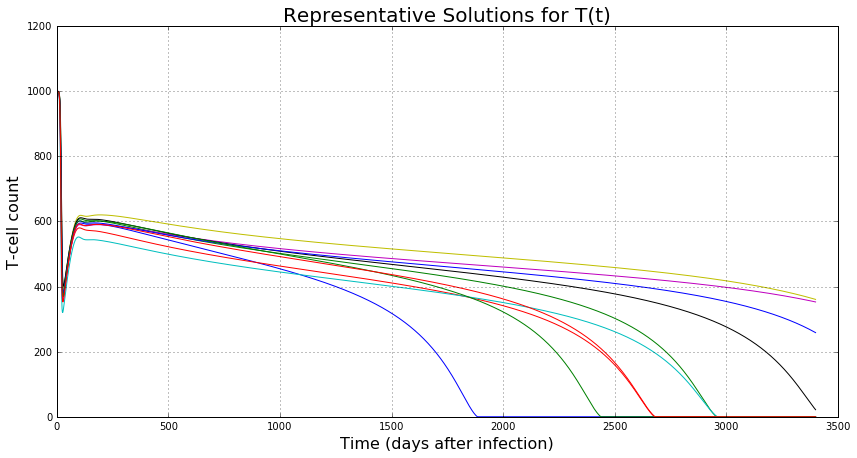

In [2]:
#Nominal Parameter Values
nominal = np.array([10, .15, 5, .2, 55.6, 3.87e-3, 1e-6, 4.5e-4, 7.45e-4, 5.22e-4, 3e-6,\
    3.3e-4, 6e-9, .537, .285, 7.79e-6, 1e-6, 4e-5, .01, .28, .05, .005, .005, .015, 2.39,\
    3e-4, .97])

#Lower and upper parameter limits
xl = .975*nominal; xu = 1.025*nominal

#Number of random points to use
N = 20

#Normalized parameter values
XX = np.random.uniform(-1, 1, (N, len(xl)))
#Unnormalized parameter values
p = .5*((np.diag(xu - xl)).dot(XX.T) + xu[:,None] + xl[:,None]).T

#Times at which to find the quantity of interest initially
times = np.linspace(1, 3400, 3400)

#Each row of f contains T(t) for t in times using parameters in the corresponding row of p
f = Tcells(p, times)

#Plot the first 10 solutions as example solutions
plt.figure(figsize=(14, 7))
for i in range(10): plt.plot(times, f[i])
plt.grid(True); plt.xlabel('Time (days after infection)', fontsize=16)
plt.ylabel('T-cell count', fontsize=16)
plt.title('Representative Solutions for T(t)', fontsize=20)

Now we select several representative times at which to approximate gradients and construct active subspaces. Gradients are approximated with first order finite differences, which takes about 10 minutes to compute with 20 samples of $\mathbf x$.

In [3]:
#A few representative times at which to construct subspaces
times = np.array([5, 15, 24, 38, 40, 45, 50, 55, 65, 90, 140, 500, 750, 1000, 1600, 1800,\
                  2000, 2200, 2400, 2800, 3400])

#Array of gradient values
df = np.empty((N, 27*len(times)))
#Step sizes to use for finite differences
h = 1e-7*(xu - xl).reshape((1, len(xl)))/2.

#Approximate gradients
for i in range(len(times)):
    #Gradients with respect to unnormalized inputs
    df[:,27*i:27*(i+1)] = ac.gradients.finite_difference_gradients(p,\
        lambda x: Tcells(x, np.linspace(1, times[i], times[i]))[:,-1], h)
    
    #Gradients with respect to normalized inputs (scaled according to the chain rule)
    df[:,27*i:27*(i+1)] *= .5*(xu - xl).reshape((1, len(xl)))

For illustration, we construct a subspace (approximate $\mathbf C$) for a particular time and plot the estimated eigenvalues, first eigenvector, and a 1-dimensional sufficient summary plot that shows model output values against the first active variable, $\mathbf w_1^T\mathbf x$, where $\mathbf w_1$ is the first eigenvector of $\mathbf C$.

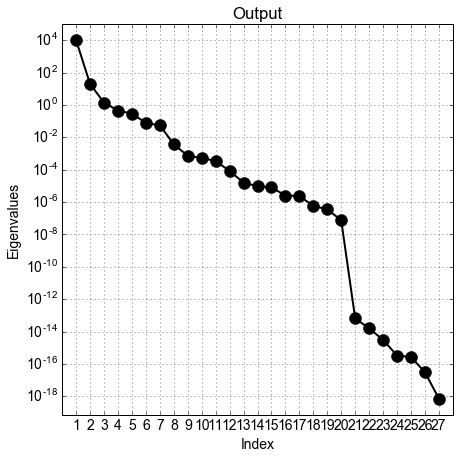

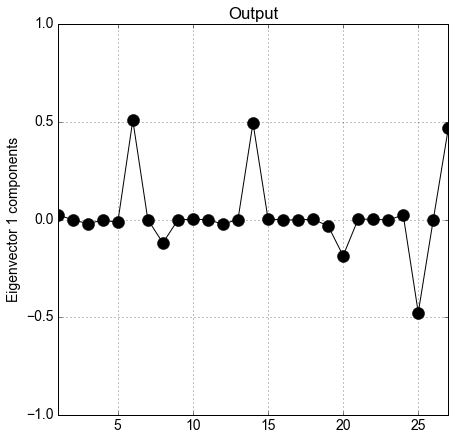

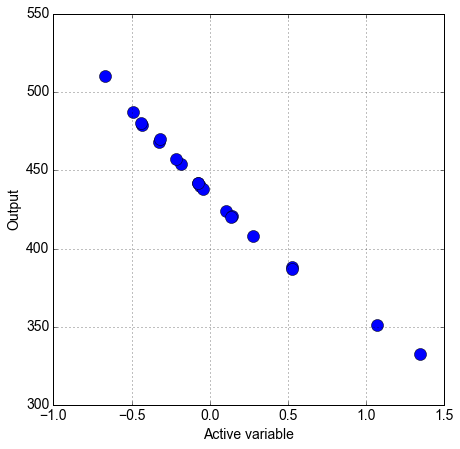

In [4]:
#subspace object
ss = ac.subspaces.Subspaces()
#Compute the subspace corresponding to t = 24 days
ss.compute(df=df[:,27*2:27*3])

#Plot eigenvalues
ac.utils.plotters.eigenvalues(ss.eigenvals)
#Plot the first eigenvector
ac.utils.plotters.eigenvectors(ss.W1)
#Make a sufficient summary plot
ac.utils.plotters.sufficient_summary(XX.dot(ss.W1), f[:,times[2]-1][:,None])

We see a gap between the first and second eigenvalues of several orders of magnitude, so we might expect a 1-dimensional subspace; this is confirmed by the tight univariate trend in the summary plot. The eigenvector shows the $6^{th}$, $14^{th}$, $25^{th}$, and $27^{th}$ variables ($K_1$, $K_9$, $\delta_7$, and $\psi$, respectively) are the most important parameters for characterizing output at this time (indicated by their large weight); most of the other parameters have weight close to 0, indicating that they don't influence output very much at this time.

We now construct 1-dimensional sufficeint summary plots for all the selected times.

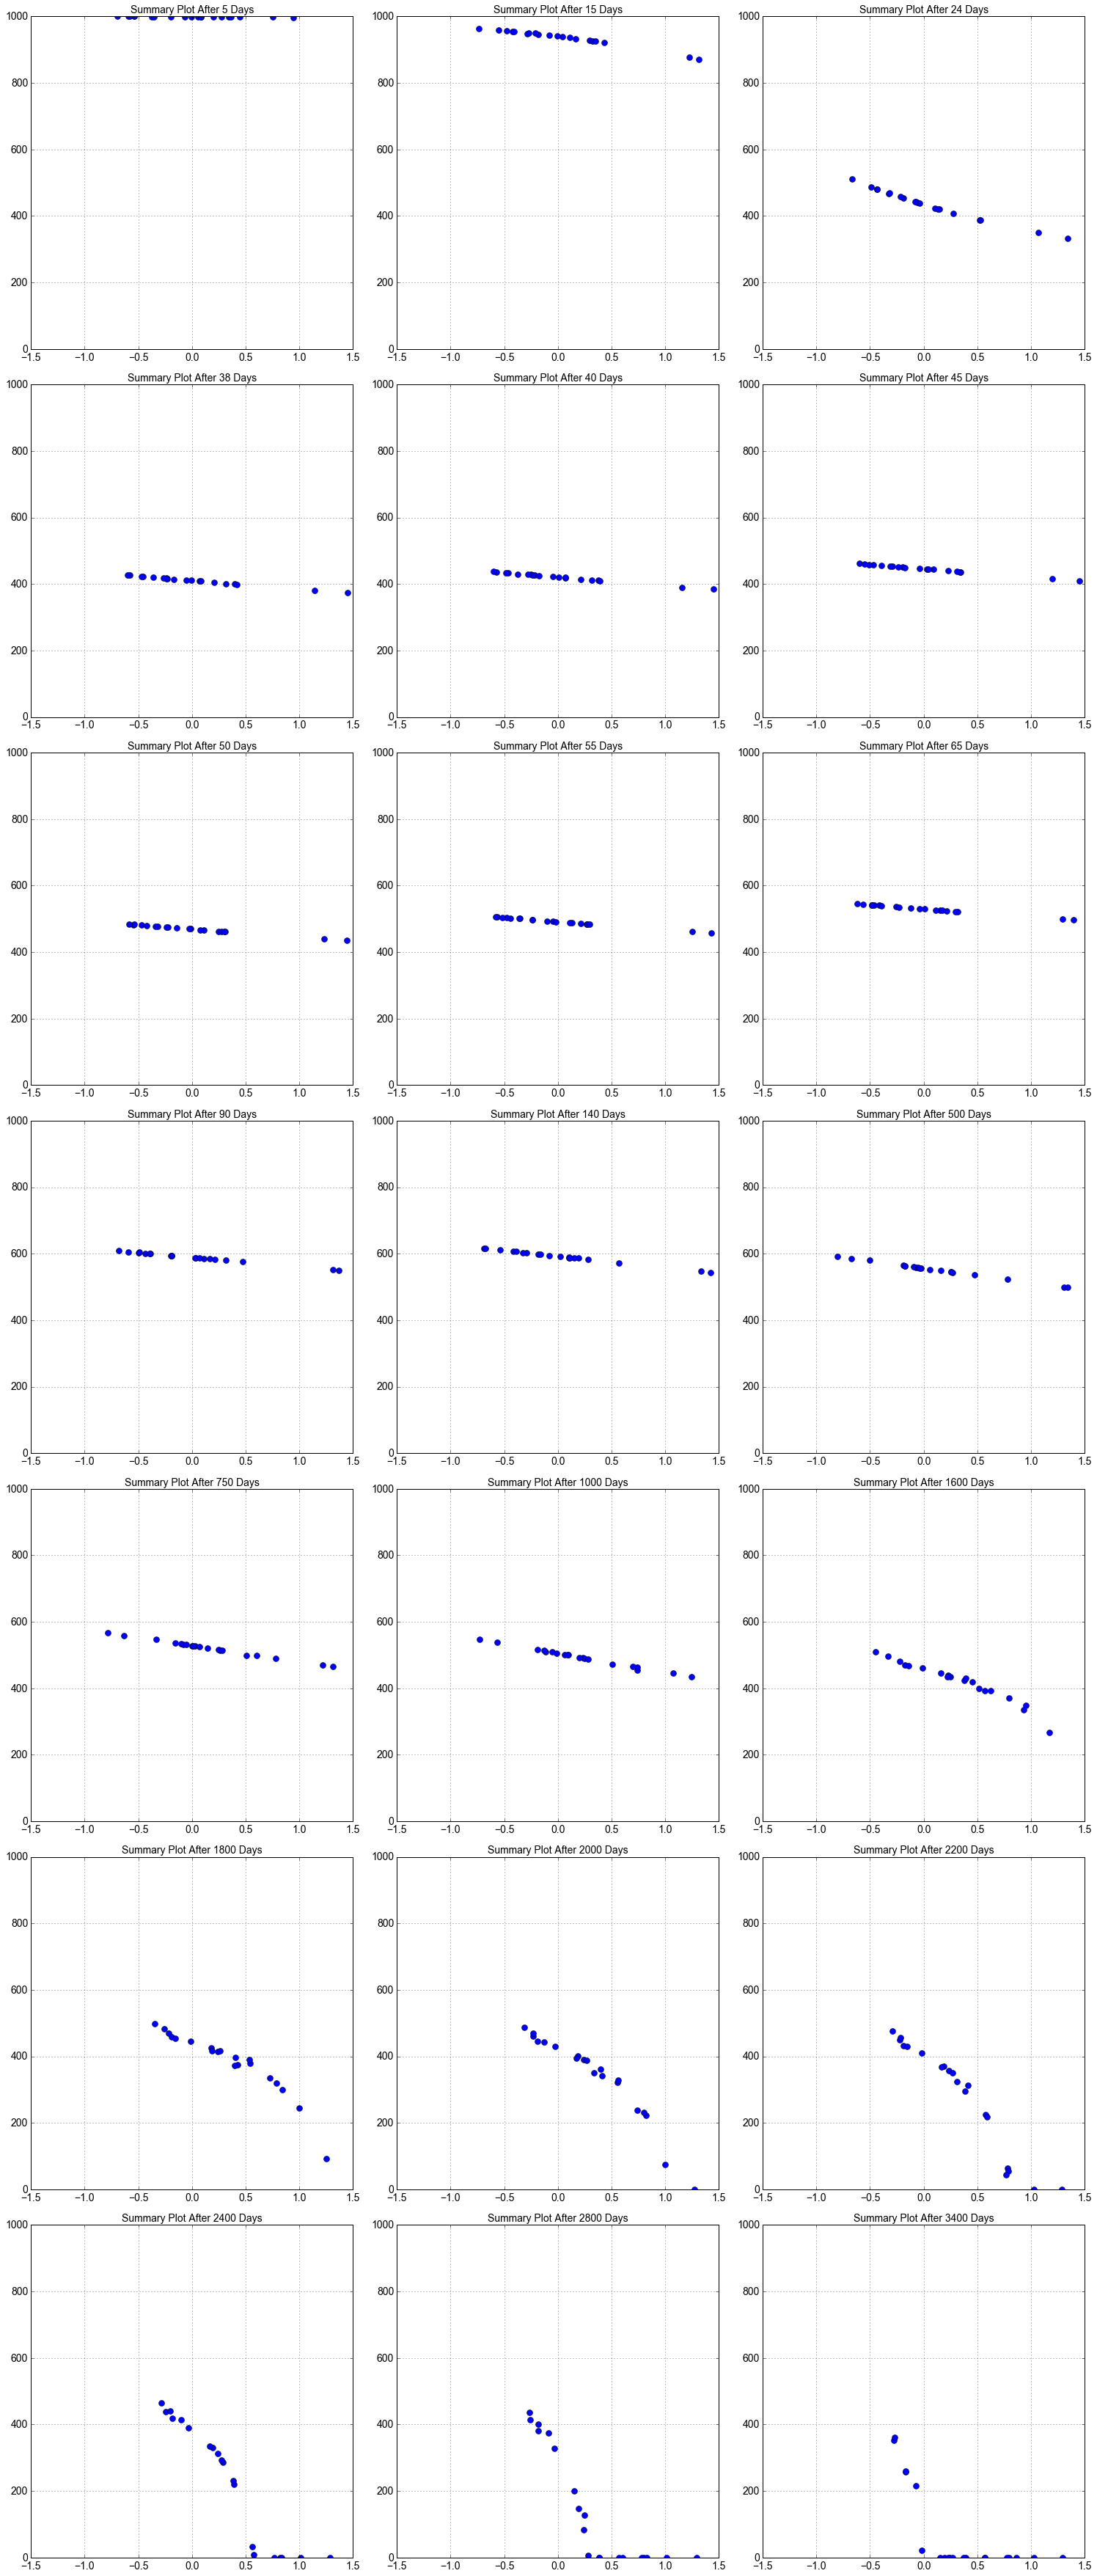

In [5]:
plt.subplots(7, 3, figsize=(3*7, 7*7))
for i in range(len(times)):
    ss.compute(df=df[:,27*i:27*(i+1)])
    
    #The active variable values
    y = XX.dot(ss.W1)
    #This is a normalization that enforces a downward trend in summary plots
    if f[np.argmin(y),times[i]-1] < f[np.argmax(y),times[i]-1]: ss.W1 *= -1.0
    
    plt.subplot(7, 3, i+1)
    plt.plot(XX.dot(ss.W1), f[:,times[i]-1][:,None], 'bo', markersize=8)
    plt.xlim([-1.5, 1.5])
    plt.ylim([0, 1000])
    plt.grid(True)
    plt.title('Summary Plot After {} Days'.format(times[i]), fontsize=14)
plt.tight_layout()
plt.show()

We can see tight univariate trends in each case, though deviation from the trend increases as time increases. We'll plot eigenvalues, the first 2 eigenvectors, and 1- and 2-dimensional summary plots for the last time (3400 days) for illustration.

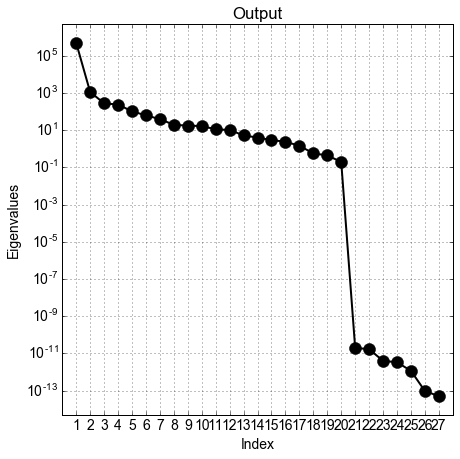

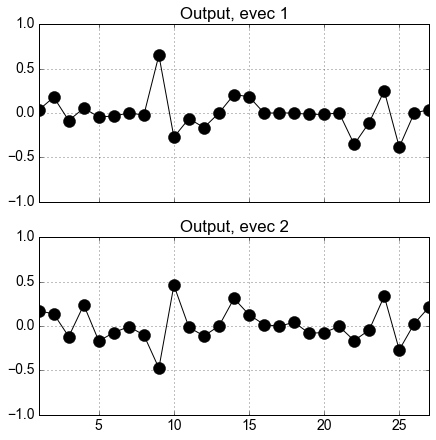

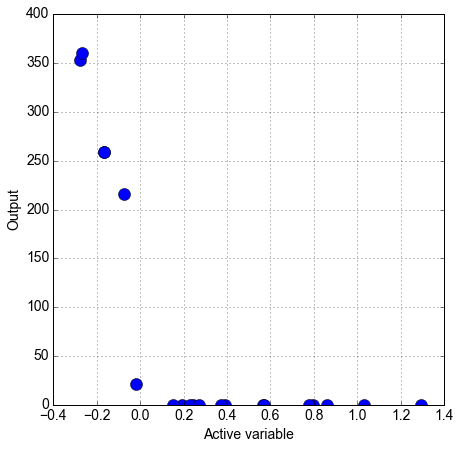

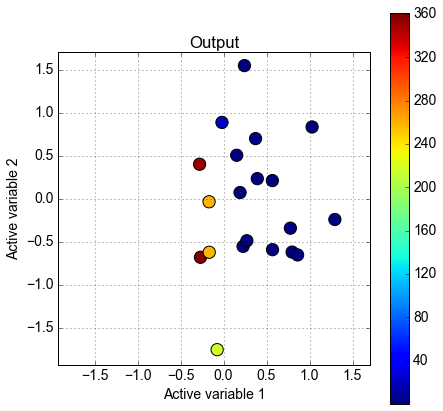

In [6]:
ss.compute(df=df[:,-27:]); ss.partition(2)
ac.utils.plotters.eigenvalues(ss.eigenvals)
ac.utils.plotters.eigenvectors(ss.W1)
ac.utils.plotters.sufficient_summary(XX.dot(ss.W1), f[:,-1][:,None])

The gap between the first and second eigenvalues is not quite as large as the early time we examined, which explains the greater deviation from the trend in the summary plot. We can also see that different variables are important here (in the AIDS stage) than the early time (the acute stage). To illustrate the time-dependence of the active subspace, we plot the components of the first eigenvector as a function of time.

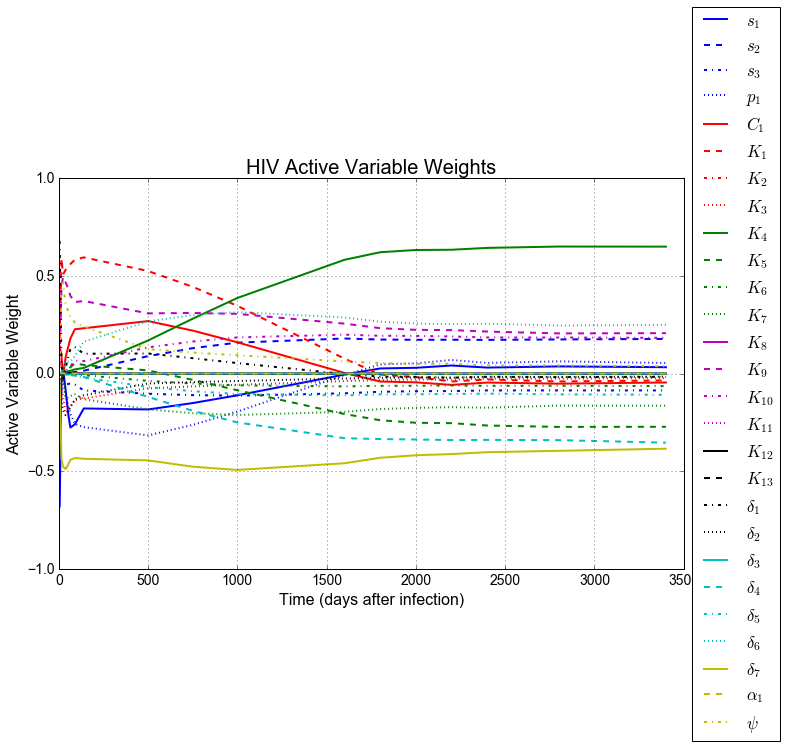

In [7]:
#Plot active variable weight as a function of time
in_labels = [r'$s_1$', r'$s_2$', r'$s_3$', r'$p_1$', r'$C_1$', r'$K_1$', r'$K_2$', r'$K_3$',\
             r'$K_4$', r'$K_5$', r'$K_6$', r'$K_7$', r'$K_8$', r'$K_9$', r'$K_{10}$',\
             r'$K_{11}$', r'$K_{12}$', r'$K_{13}$', r'$\delta_1$', r'$\delta_2$',\
             r'$\delta_3$', r'$\delta_4$', r'$\delta_5$', r'$\delta_6$', r'$\delta_7$',\
             r'$\alpha_1$', r'$\psi$']
Colors = ['b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'm', 'm', 'm',
          'm', 'k', 'k', 'k', 'k', 'c', 'c', 'c', 'c', 'y', 'y', 'y']
styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--',
          '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.']
weights = np.empty((len(times), 27))
for i in range(len(times)):
    ss.compute(df=df[:,27*i:27*(i+1)])
    y = XX.dot(ss.W1)
    if f[np.argmin(y),times[i]-1] < f[np.argmax(y),times[i]-1]: ss.W1 *= -1.0
    weights[i,:] = ss.W1.squeeze()
plt.figure(figsize=(14, 7))
for i in range(27):
    plt.plot(times, weights[:,i], color=Colors[i], linestyle=styles[i],
             linewidth=2, label=in_labels[i])
plt.xlim((0, 3500))
plt.ylim([-1, 1])
plt.grid(True)
plt.ylabel('Active Variable Weight', fontsize=16)
plt.xlabel('Time (days after infection)', fontsize=16)
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('HIV Active Variable Weights', fontsize=20)

We can see that many parameters are important in some times and unimportant in others; for example, $K_4$ is unimportant in the acute stage but very important in the chronic and AIDS stages while $K_1$ is important in the acute and chronic stages but unimportant in the AIDS stage. Also, few variables have weight near zero for the entire course of the disease, so one can't significantly reduce the dimension of the parameter space globally in time by 'discarding' some parameters by setting them to nominal values since only a few are unimportant for all time.

A drawback to the preceding analysis is that we only use a few samples of the parameter space; it is possible that we have a 'false positive' in the sense that we happen to have drawn samples that indicate an active subspace when in fact there is none. To more accurately determine the subspaces, code similar to above (contained in the 'generate_data.py' file) was used to generate 1000 samples of the parameter space and their associated outputs and gradients. This took about 8 hours on a standard workstation (mostly in the computation of the gradients). We repeat the above analysis with these samples to verify the results.

In [8]:
#Unnormalized input values
X = pn.DataFrame.from_csv('inputs.csv').as_matrix()
#Corresponding outputs at the times analyzed previously
f = pn.DataFrame.from_csv('outputs.csv').as_matrix()
#Gradients with respect to normalized inputs
df = pn.DataFrame.from_csv('gradients.csv').as_matrix()

#Normalized inputs
XX = ac.utils.misc.BoundedNormalizer(xl, xu).normalize(X)

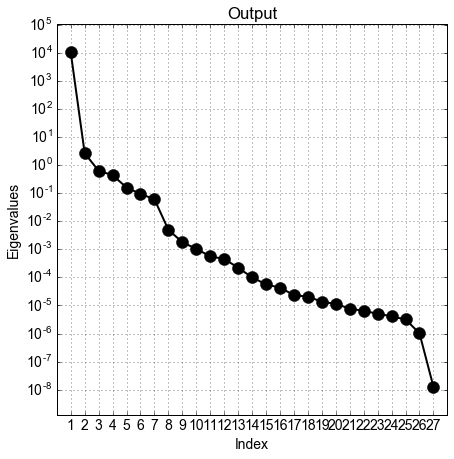

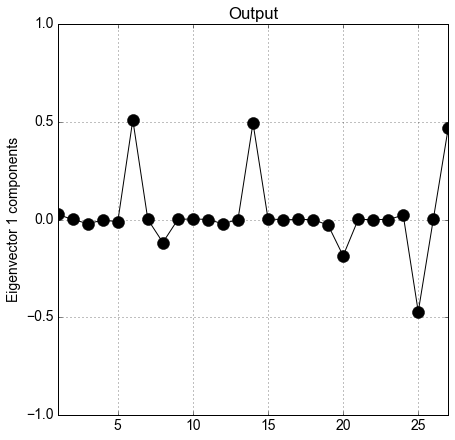

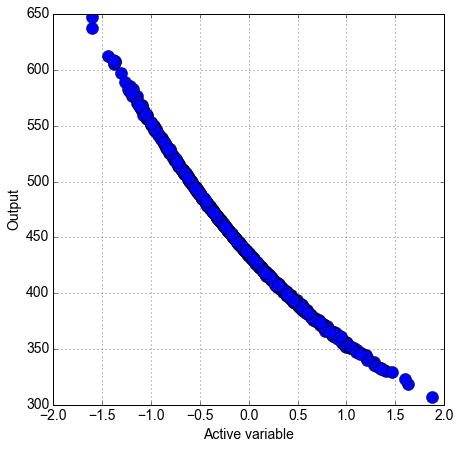

In [9]:
#Make representative plots for the acute stage
ss.compute(df=df[:,27*2:27*3])

ac.utils.plotters.eigenvalues(ss.eigenvals)
ac.utils.plotters.eigenvectors(ss.W1)
ac.utils.plotters.sufficient_summary(XX.dot(ss.W1), f[:,2][:,None])

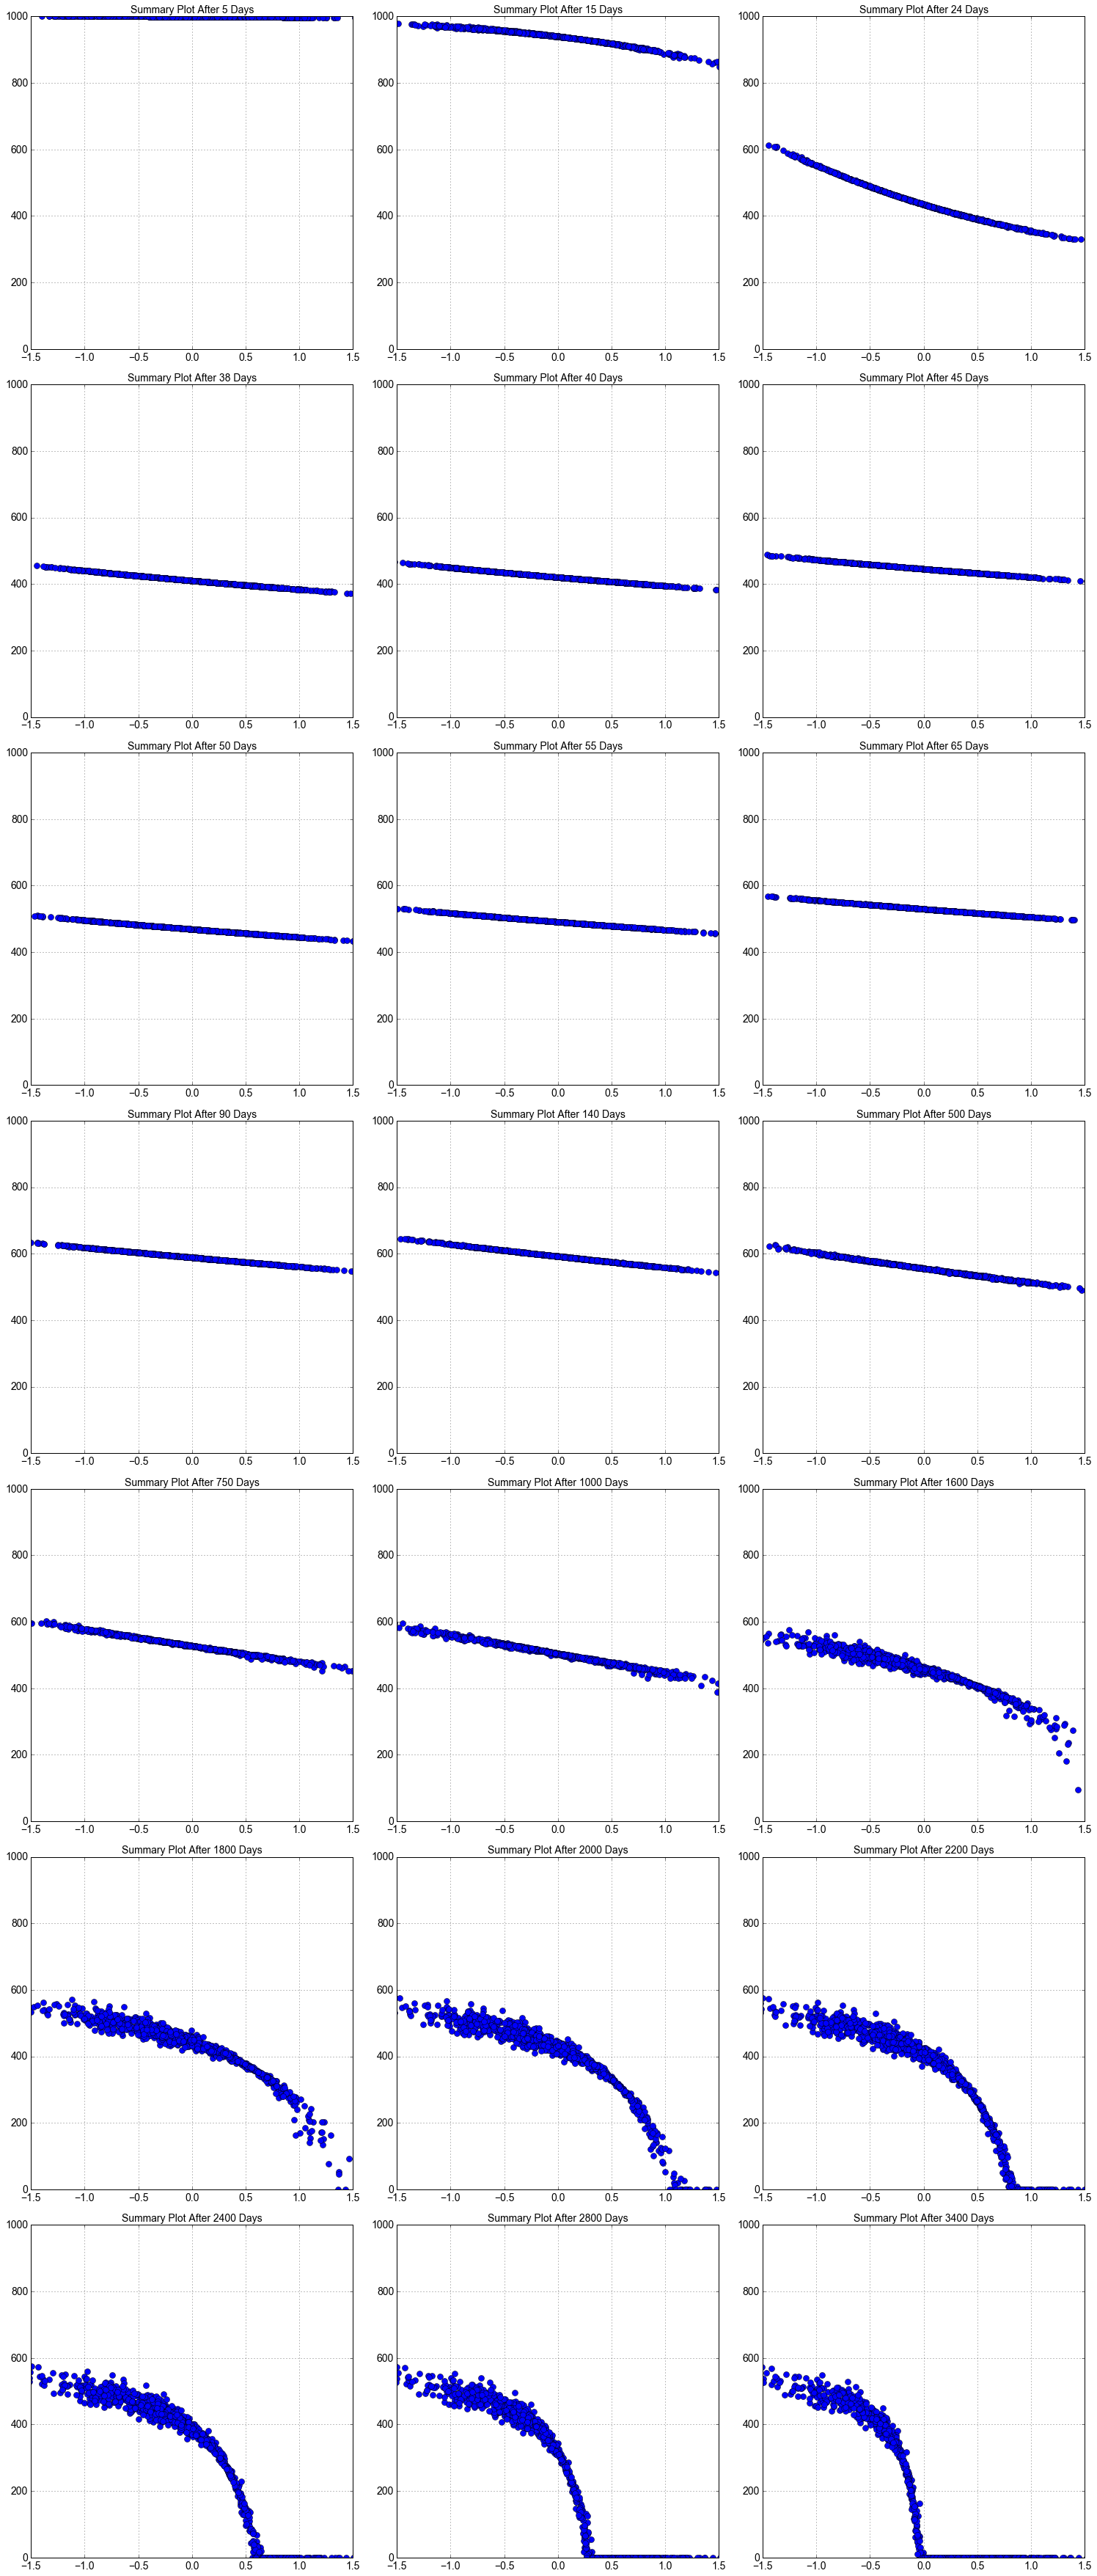

In [10]:
#Collection of summary plots
plt.subplots(7, 3, figsize=(3*7, 7*7))
for i in range(len(times)):
    ss.compute(df=df[:,27*i:27*(i+1)])
    
    y = XX.dot(ss.W1)
    if f[np.argmin(y),i] < f[np.argmax(y),i]: ss.W1 *= -1.0
    
    plt.subplot(7, 3, i+1)
    plt.plot(XX.dot(ss.W1), f[:,i][:,None], 'bo', markersize=8)
    plt.xlim([-1.5, 1.5])
    plt.ylim([0, 1000])
    plt.grid(True)
    plt.title('Summary Plot After {} Days'.format(times[i]), fontsize=14)
plt.tight_layout()
plt.show()

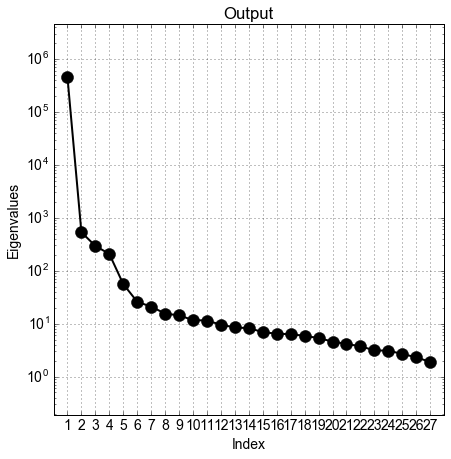

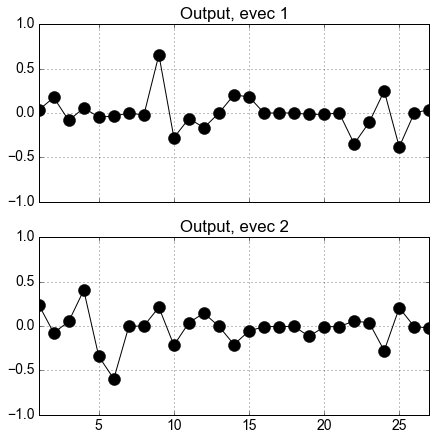

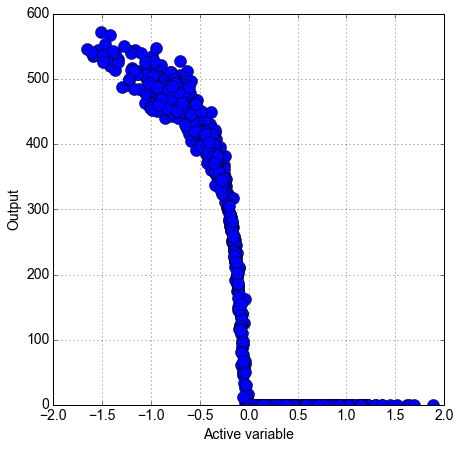

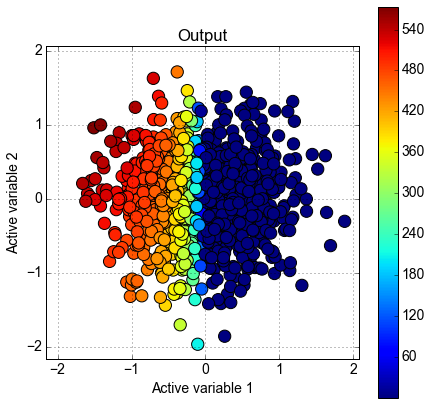

In [11]:
#Make representative plots for the AIDS stage
ss.compute(df=df[:,-27:]); ss.partition(2)
ac.utils.plotters.eigenvalues(ss.eigenvals)
ac.utils.plotters.eigenvectors(ss.W1)
ac.utils.plotters.sufficient_summary(XX.dot(ss.W1), f[:,-1][:,None])

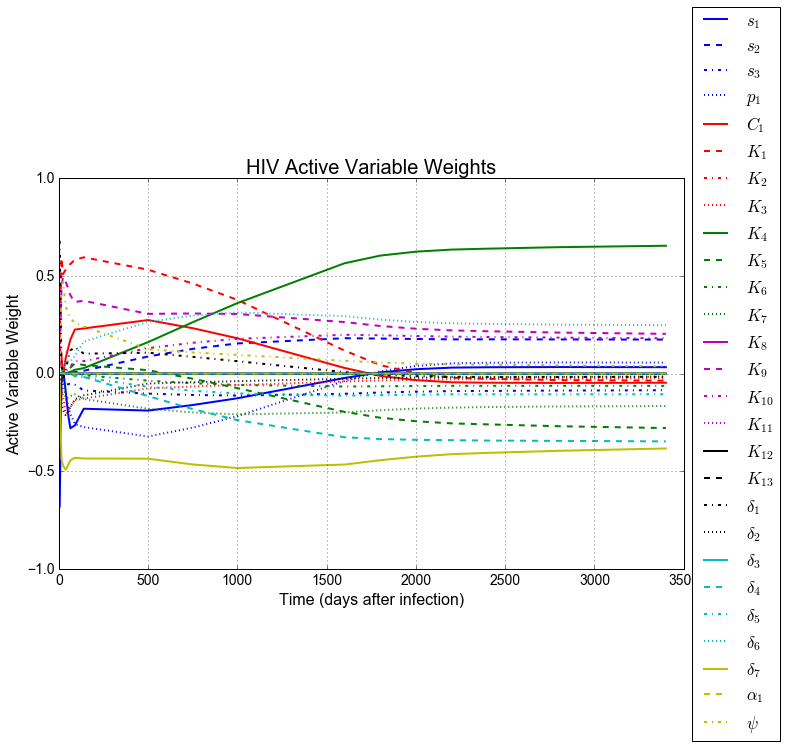

In [12]:
#Plot active variable weight as a function of time
for i in range(len(times)):
    ss.compute(df=df[:,27*i:27*(i+1)])
    y = XX.dot(ss.W1)
    if f[np.argmin(y),i] < f[np.argmax(y),i]: ss.W1 *= -1.0
    weights[i,:] = ss.W1.squeeze()
plt.figure(figsize=(14, 7))
for i in range(27):
    plt.plot(times, weights[:,i], color=Colors[i], linestyle=styles[i],
             linewidth=2, label=in_labels[i])
plt.xlim((0, 3500))
plt.ylim([-1, 1])
plt.grid(True)
plt.ylabel('Active Variable Weight', fontsize=16)
plt.xlabel('Time (days after infection)', fontsize=16)
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('HIV Active Variable Weights', fontsize=20)

We can see similar results when using the large sample (1000) compared to the small sample (20); summary plots, eigenvalues/vectors, and the time-dependence of the active variable weights all look extremely similar between the sample sizes. This indicates robustness in our results, and we might thus reasonably use these active subspaces for various applications, for example, global-in-time surrogate modelling or constraining an inverse problem.